# Sheet 4
## Question 2

### _MI BCCN 2022_

Ahmed Abdalfatah - Arina Belova - Luisa Drescher - Myriam Hamon


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Linear neuron: input-output
x = np.array([-1,0.3,2])
y = np.array([-0.1, 0.5, 0.5])

In [4]:
x_with_bias = np.transpose(np.array([[1, x_i] for x_i in x]))
x_with_bias

array([[ 1. ,  1. ,  1. ],
       [-1. ,  0.3,  2. ]])

In [5]:
# Gradient descent components
p = len(x)

hessian = 1/p * x_with_bias @ np.transpose(x_with_bias)

In [6]:
def gradient(current_weight):
    return (hessian @ current_weight) - 1/p * x_with_bias @ y  

### Brute-force gradient descent

In [7]:
def gradient_update(current_weight, l_r):
    return current_weight - l_r * gradient(current_weight)

In [8]:
reference_weight = np.zeros(2)
current_weight = np.array([-0.45,0.2]) # bias and weight
array_of_weights = [current_weight]
l_r = 0.01 # adequate?

# do the first update before the while loop because otherwise god knows how to code this:
reference_weight = gradient_update(current_weight, l_r)
array_of_weights.append(reference_weight)

while not (np.isclose(reference_weight, current_weight)).all():
    current_weight = reference_weight
    reference_weight = gradient_update(current_weight, l_r)
    array_of_weights.append(reference_weight)
 

In [9]:
# A looooot of steps needed to converge
len(array_of_weights)

957

In [10]:
w_0_val = [arr[0] for arr in array_of_weights]
w_1_val = [arr[1] for arr in array_of_weights]

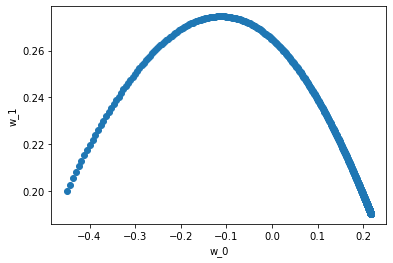

In [11]:
plt.scatter(w_0_val, w_1_val)
plt.xlabel("w_0")
plt.ylabel("w_1")
plt.show()

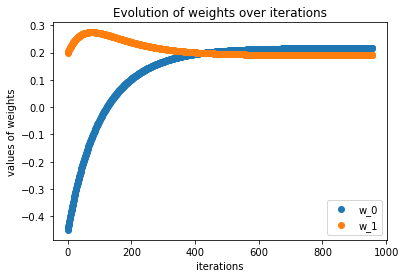

In [12]:
plt.scatter(range(len(w_0_val)), w_0_val, label="w_0")
plt.scatter(range(len(w_1_val)), w_1_val, label="w_1")
plt.xlabel("iterations")
plt.ylabel("values of weights")
plt.legend()
plt.title("Evolution of weights over iterations")
plt.show()

### A bit better line search

In [13]:
# Line search 
def line_optimal_l_r(grad):
    return np.dot(grad, grad) / np.dot(grad, hessian @ grad)

In [14]:
def line_gradient_update(current_weight):
    grad = gradient(current_weight)
    return current_weight - line_optimal_l_r(grad) * grad

In [15]:
current_weight = np.array([-0.45,0.2]) # bias and weight
reference_weight = np.zeros(2)
array_of_weights_line = [current_weight]

# do the first update before the while loop because otherwise god knows how to code this:
reference_weight = line_gradient_update(current_weight)
array_of_weights_line.append(reference_weight)

while not (np.isclose(reference_weight, current_weight)).all():
    current_weight = reference_weight
    reference_weight = line_gradient_update(current_weight)
    array_of_weights_line.append(reference_weight)
 

In [16]:
# Less steps!
len(array_of_weights_line)

16

In [17]:
w_0_val = [arr[0] for arr in array_of_weights_line]
w_1_val = [arr[1] for arr in array_of_weights_line]

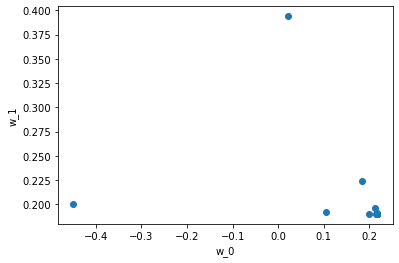

In [18]:
plt.scatter(w_0_val, w_1_val)
plt.xlabel("w_0")
plt.ylabel("w_1")
plt.show()

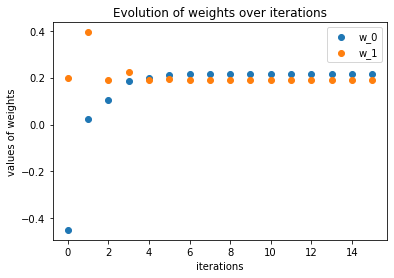

In [19]:
plt.scatter(range(len(w_0_val)), w_0_val, label="w_0")
plt.scatter(range(len(w_1_val)), w_1_val, label="w_1")
plt.xlabel("iterations")
plt.ylabel("values of weights")
plt.legend()
plt.title("Evolution of weights over iterations")
plt.show()

From the plots we can see that in line search we indeed have this "moving backwards" downside of the method as w_1 rose and dropped after 3 first iterations

### The power of conjugates!

In [20]:
def conj_optimal_l_r(direction, grad):
    return -np.dot(direction, grad) / np.dot(direction, hessian @ direction)

In [21]:
def conj_gradient_update(grad, direction, current_weight):
    return current_weight + conj_optimal_l_r(direction, grad) * direction

In [22]:
def conj_direction_update(new_grad, old_grad, old_direction):
    beta = - np.dot(new_grad, new_grad) / np.dot(old_grad, old_grad)
    return new_grad + beta * old_direction

In [23]:
def one_iteration_conj(current_weight, current_direction):
    current_gradient = gradient(current_weight)
    new_weight = conj_gradient_update(current_gradient, current_direction, current_weight)
    new_gradient = gradient(new_weight)
    new_direction = conj_direction_update(new_gradient, current_gradient, current_direction)
    return new_weight, new_direction

In [24]:
current_weight = np.array([-0.45,0.2]) # bias and weight
reference_weight = np.zeros(2)
array_of_weights_conj = [current_weight]
conj_direction = -gradient(current_weight)

# do the first update before the while loop because otherwise god knows how to code this:
reference_weight, conj_direction = one_iteration_conj(current_weight, conj_direction)
array_of_weights_conj.append(reference_weight)

while not (((np.isclose(reference_weight, current_weight)).all()) or (not np.any(conj_direction))):
    current_weight = reference_weight
    reference_weight, conj_direction = one_iteration_conj(current_weight, conj_direction)
    array_of_weights_conj.append(reference_weight)

In [25]:
len(array_of_weights_conj)
# Yey, even smaller # of steps!

3

In [26]:
w_0_val = [arr[0] for arr in array_of_weights_conj]
w_1_val = [arr[1] for arr in array_of_weights_conj]

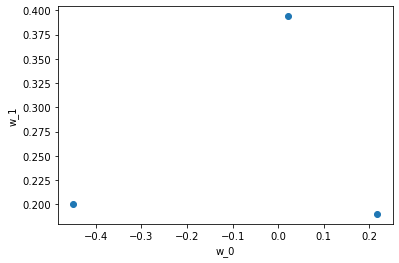

In [27]:
plt.scatter(w_0_val, w_1_val)
plt.xlabel("w_0")
plt.ylabel("w_1")
plt.show()

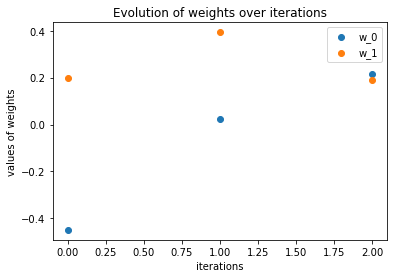

In [28]:
plt.scatter(range(len(w_0_val)), w_0_val, label="w_0")
plt.scatter(range(len(w_1_val)), w_1_val, label="w_1")
plt.xlabel("iterations")
plt.ylabel("values of weights")
plt.legend()
plt.title("Evolution of weights over iterations")
plt.show()

We showed that the fastest gradient method is conjugate gradient procedure that converges to similar weights as other more brute force methods. We can also observe that w_1 is a bit odd because in all the gradient methods it does not have consistent trend and tends to rise and drop in value in the beginning of the weight evolution. However, in conjugate method we converge the fastest.

Order or performance (from best to worst):
1. Conjugate Method
2. Line search
3. O.G Gradient Descent :D

Ciao!